## Data Mining Tool

To use this package, ensure that:
    * http://cdh578egzp.telkom.co.za:8880/notebooks/Jannes%20Test/dm_library/dm_modules/dm.py is in your working directory.
    
The code below uses the a3_dispatches table as an example to illustrate each graph.     

### The current package supports 5 chart functions:
   * Barcharts for categorical (dm.g_barplot)
   * Histograms for numerical (dm.g_histogram)
   * Scatter plots for numerical vs numerical (dm.g_scatter)
   * KDE plots for numerical vs categorical (dm.g_kde)
   * Chi-Squared plots for categorical vs categorical (dm.g_chi2)


In [1]:
import dm
reload(dm)

<module 'dm' from 'dm.pyc'>

In [2]:
df, sc, sqlContext, table = dm.load_parquet('a1_ss', 'a3_dispatch', sqlContext, sc)

In [3]:
df = df.withColumn('TTR',dm.F.datediff('dispatch_date_end','dispatch_date_start'))

In [16]:
df.printSchema()

root
 |-- unique_ticket_id: string (nullable = true)
 |-- ticket_number: string (nullable = true)
 |-- order_num: string (nullable = true)
 |-- dn_number: string (nullable = true)
 |-- dispatch_number: string (nullable = true)
 |-- unibase_ref_no: string (nullable = true)
 |-- cbs_ref_no: string (nullable = true)
 |-- master_ticket_id: string (nullable = true)
 |-- origin: string (nullable = true)
 |-- area: string (nullable = true)
 |-- sub_area: string (nullable = true)
 |-- dispatch_date_start: timestamp (nullable = true)
 |-- closed_date: timestamp (nullable = true)
 |-- dispatch_date_end: timestamp (nullable = true)
 |-- service_type: string (nullable = true)
 |-- cause_code: string (nullable = true)
 |-- location_code: string (nullable = true)
 |-- clear_code: string (nullable = true)
 |-- cause_code_desc: string (nullable = true)
 |-- cause_code_summary: string (nullable = true)
 |-- location_code_desc: string (nullable = true)
 |-- location_code_summary: string (nullable = true

# Categorical Summary

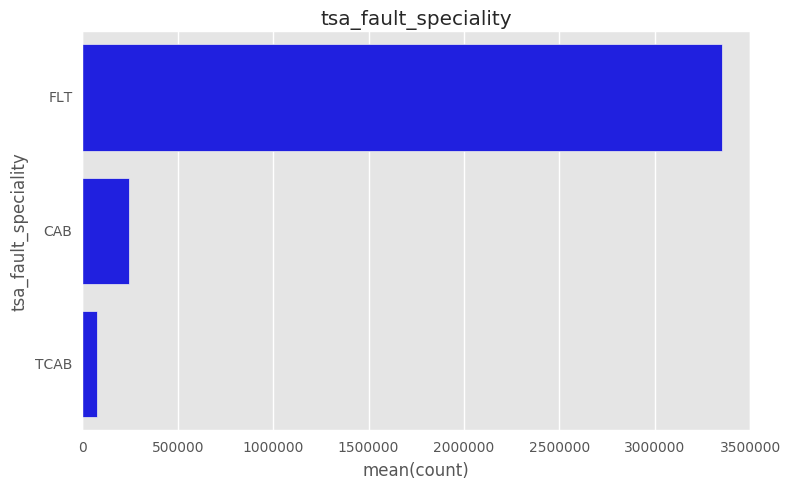

(<matplotlib.axes._subplots.AxesSubplot at 0x558ff50>,
 '/var/lib/hadoop-hdfs/Jannes Test/dm_library/graphs/tsa_fault_speciality.png')

In [8]:
dm.g_barplot(df, 'tsa_fault_speciality', outlier_thres=0.01)

# Continuous Summary

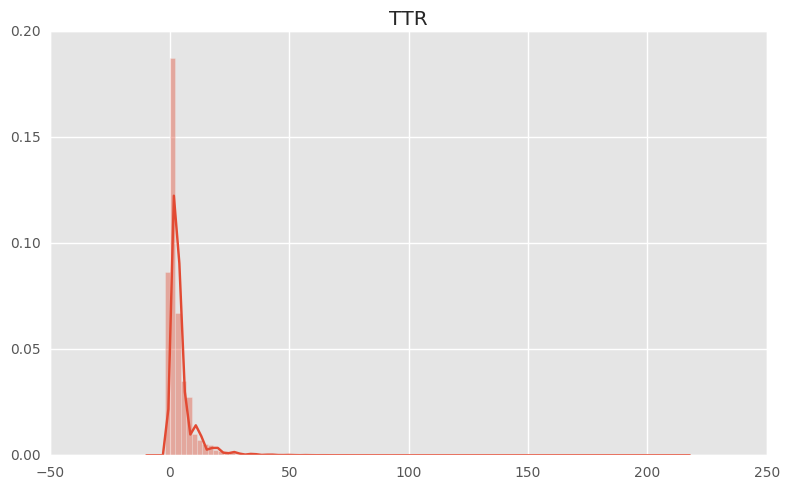

(<matplotlib.axes._subplots.AxesSubplot at 0xa739bd0>,
 '/var/lib/hadoop-hdfs/Jannes Test/dm_library/graphs/TTR.png')

In [33]:
dm.g_histogram(df, 'TTR')

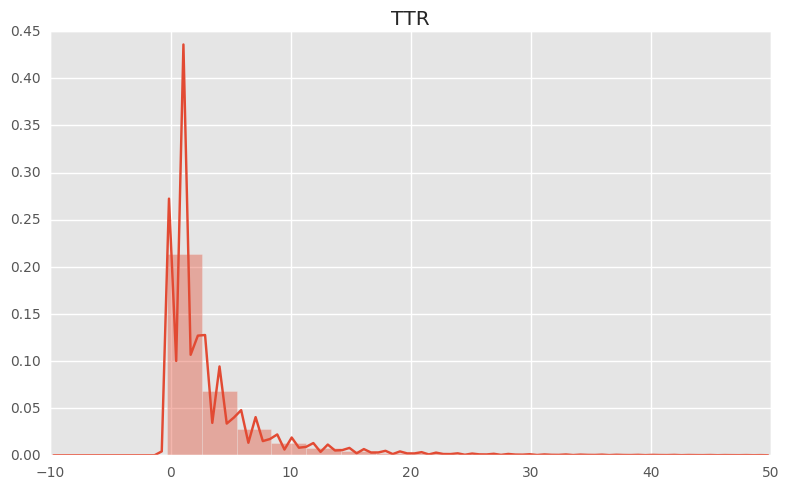

(<matplotlib.axes._subplots.AxesSubplot at 0x16a77b10>,
 '/var/lib/hadoop-hdfs/Jannes Test/dm_library/graphs/TTR.png')

In [24]:
dm.g_histogram(df, 'TTR', _max=50, buckets=20)

# Continuous v Continuous 

In [20]:
df_RDR = dm.get_rate_df(df, ['TTR'], 'true_fdc24_redispatch', 'tsa_completion_code')

<class 'pyspark.sql.dataframe.DataFrame'>


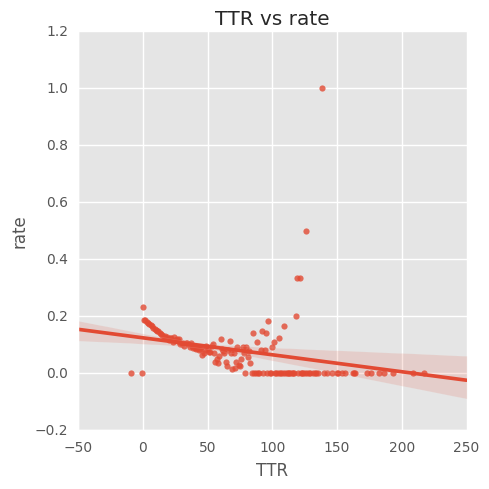

(<seaborn.axisgrid.FacetGrid at 0x6110c50>,
 '/var/lib/hadoop-hdfs/Jannes Test/dm_library/graphs/TTR_vs_rate.png')

In [21]:
dm.g_scatter(df_RDR, 'TTR', 'rate')

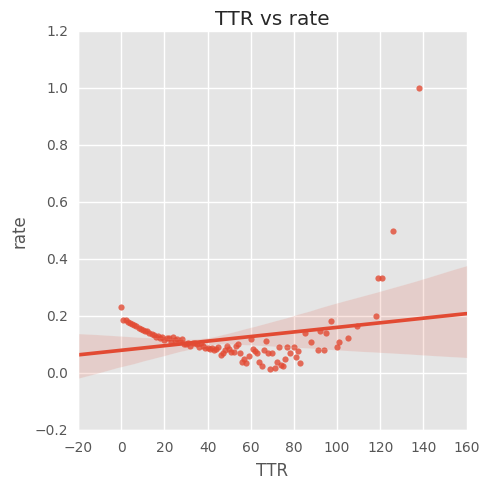

(<seaborn.axisgrid.FacetGrid at 0x17b7b490>,
 '/var/lib/hadoop-hdfs/Jannes Test/dm_library/graphs/TTR_vs_rate.png')

In [25]:
dm.g_scatter(df_RDR[df_RDR['rate'] > 0], 'TTR', 'rate')

# Continuous v Categorical

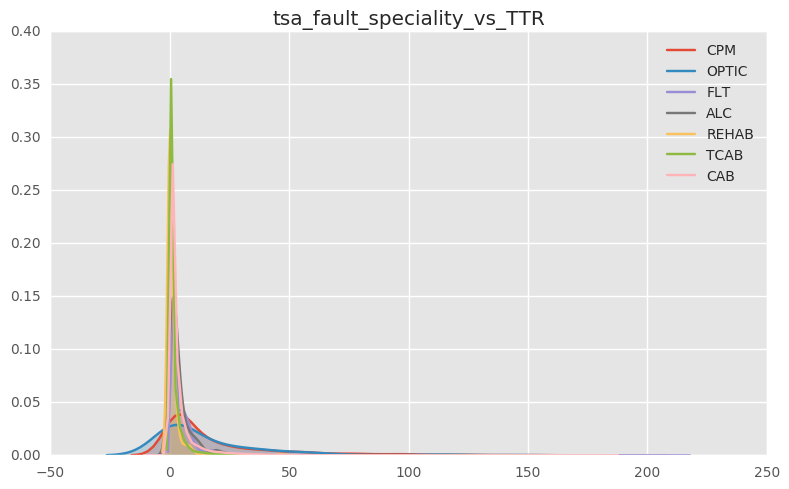

(<matplotlib.axes._subplots.AxesSubplot at 0x17674350>,
 '/var/lib/hadoop-hdfs/Jannes Test/dm_library/graphs/tsa_fault_speciality_vs_TTR.png')

In [7]:
dm.g_kde(df, 'tsa_fault_speciality', 'TTR')

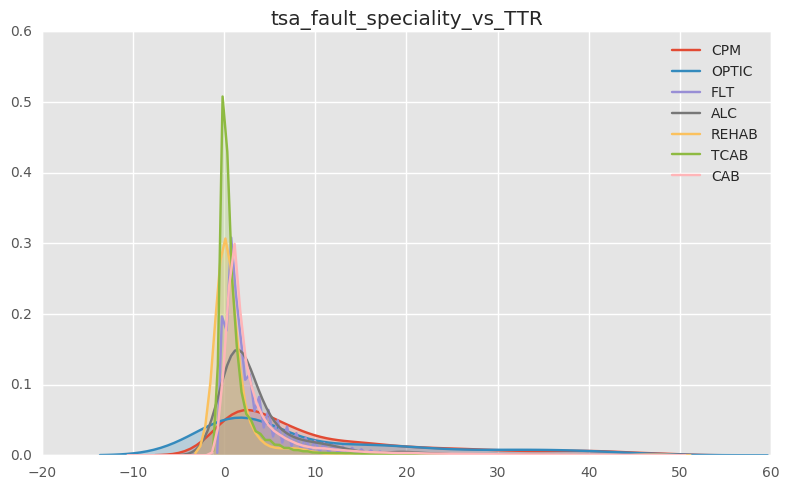

(<matplotlib.axes._subplots.AxesSubplot at 0x17b53090>,
 '/var/lib/hadoop-hdfs/Jannes Test/dm_library/graphs/tsa_fault_speciality_vs_TTR.png')

In [26]:
dm.g_kde(df, 'tsa_fault_speciality', 'TTR', _max=50)

# Categorical v Categorical

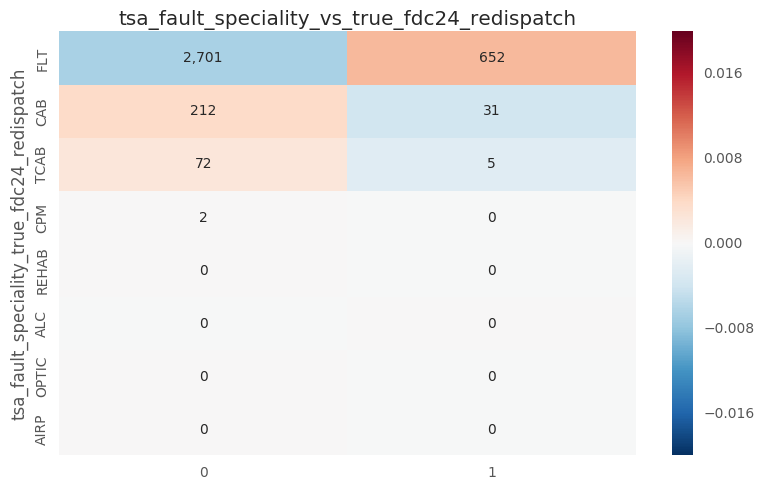

(<matplotlib.axes._subplots.AxesSubplot at 0xd03c1d0>,
 '/var/lib/hadoop-hdfs/Jannes Test/dm_library/graphs/tsa_fault_speciality_vs_true_fdc24_redispatch.png')

In [32]:
dm.g_chi2(df, 'tsa_fault_speciality', 'true_fdc24_redispatch')